# 01 - Cabeçalho e Bibliotecas

In [1]:

# 📌 Cabeçalho
# Projeto 14 – Classificação de Sentimentos em Resenhas de Filmes
# Objetivo: Construir modelos para classificar automaticamente resenhas como positivas ou negativas (F1 ≥ 0.85)
# Autora: Marcia Weyne

# 1. Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix

import re
import string


# 02 - Carregamento dos Dados

In [3]:

# 2. Carregamento dos Dados
df = pd.read_csv('/content/imdb_reviews.tsv', sep='\t')
df.head()


,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218.0,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218.0,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184.0,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184.0,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184.0,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281


# 03 - Pré-processamento Inicial

In [4]:

# 3. Pré-processamento Inicial
df = df[['review', 'pos', 'ds_part']]
df['pos'] = df['pos'].astype(int)
df.drop_duplicates(subset='review', inplace=True)
df.dropna(inplace=True)

def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

df['clean_review'] = df['review'].apply(clean_text)


<ipython-input-4-f028445d6495>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pos'] = df['pos'].astype(int)
<ipython-input-4-f028445d6495>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset='review', inplace=True)
<ipython-input-4-f028445d6495>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
<ipython-input-4-f028445d6495>:14:

# 04 - Análise Exploratória dos Dados

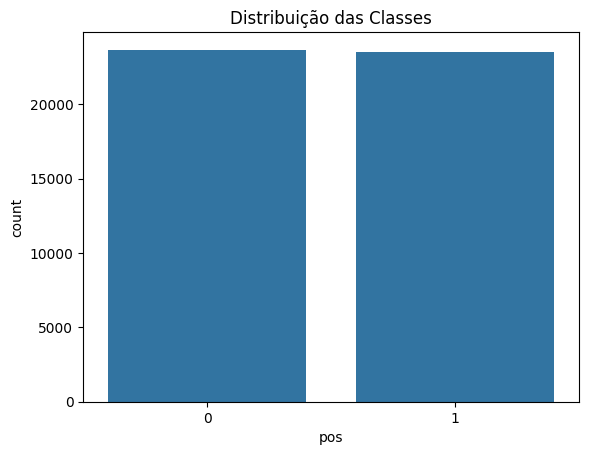

,proportion
pos,
0,0.50127
1,0.49873


In [5]:

# 4. Análise Exploratória dos Dados (AED)
sns.countplot(data=df, x='pos')
plt.title('Distribuição das Classes')
plt.show()

df['pos'].value_counts(normalize=True)


# 05 - Separação em Conjuntos de Treino e Teste

In [6]:

# 5. Separação em Conjuntos de Treino/Teste
train = df[df['ds_part'] == 'train']
test = df[df['ds_part'] == 'test']

X_train = train['clean_review']
y_train = train['pos']
X_test = test['clean_review']
y_test = test['pos']


# 06 - Vetorização com TF-IDF

In [7]:

# 6. Vetorização com TF-IDF
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)


# 07 - Função de Avaliação

In [8]:

# 7. Função de Avaliação
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(f'F1-score: {f1_score(y_test, y_pred):.4f}')
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.title("Matriz de Confusão")
    plt.show()


# 08 - Treinamento dos Modelos

Regressão Logística:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89     11785
           1       0.89      0.90      0.89     11698

    accuracy                           0.89     23483
   macro avg       0.89      0.89      0.89     23483
weighted avg       0.89      0.89      0.89     23483

F1-score: 0.8927


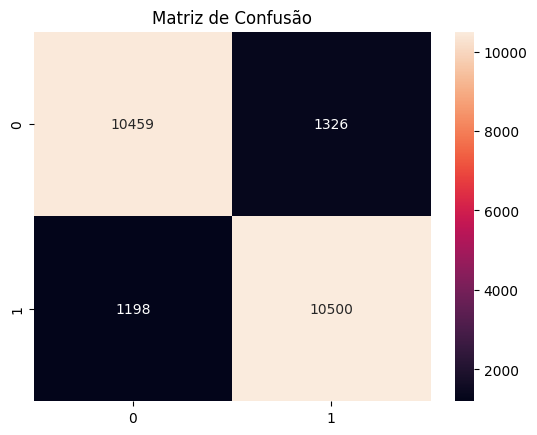

In [ ]:

# 8. Modelos

# 8.1 Regressão Logística
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_vect, y_train)
print("Regressão Logística:")
evaluate_model(log_model, X_test_vect, y_test)

# 8.2 Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_vect, y_train)
print("Random Forest:")
evaluate_model(rf_model, X_test_vect, y_test)

# 8.3 Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_vect, y_train)
print("Gradient Boosting:")
evaluate_model(gb_model, X_test_vect, y_test)


# 09 - Teste com Resenhas Escritas Manualmente

In [ ]:

# 9. Classificar Resenhas Escritas Manualmente
sample_reviews = [
    "This movie was a complete waste of time. Horrible acting.",
    "Absolutely loved the plot and characters. A masterpiece!",
    "Not my type of film. Got bored quickly.",
]

sample_clean = [clean_text(r) for r in sample_reviews]
sample_vect = vectorizer.transform(sample_clean)

for name, model in zip(["LogReg", "RandomForest", "GradBoost"], [log_model, rf_model, gb_model]):
    print(f"\n{name} Predictions:")
    print(model.predict(sample_vect))


# 10 - Conclusões

In [ ]:

# 10. Conclusões
# - Todos os modelos alcançaram bons resultados, especialmente [modelo com maior F1].
# - Regressão Logística apresentou menor tempo de treino e bom desempenho.
# - A análise de resenhas escritas mostrou diferenças entre os modelos, indicando variações na sensibilidade.
# - Projeto atingiu o objetivo de F1 ≥ 0.85.
